# BepiColombo PWI EFD Pot: L1a QL -- 2025/7/25

In [35]:
import copy
import datetime
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from spacepy import pycdf

In [36]:
sys.path.append('./lib/')
import Bepi_PWI_EFD_pot_data as bepi_data
import Bepi_PWI_EFD_pot_lib  as bepi_pot
# import Bepi_PWI_EFD_cal_lib  as bepi_cal

# parameter set -- to be modified

In [37]:
# *** Dump ***
dump_mode = 1                           # 0: no-dump  1:plot dump

# *** CAL ***
unit_mode = 2                           # [Power]     0: RAW    1: V    2: V/m
band_mode = 0                           # [Power]     0: sum    1: /Hz
cal_mode  = 2                           # [Power]     0: background     1: CAL     2: all

# *** Unit ***
time_mode = 0                           # [Time]      0: Epoch   1: data number
gap_mode  = 1                           # [gap]       0: n/a     1: gap

# *** Power range set ***
p_raw_max = +10                         # background: 7.5   CAL: 10
p_raw_min = -10                         # background: 2.5   CAL: 5

# *** Directory set: set by User ***
work_dir = '/Users/user/0-python/Bepi_python/ql/'   # Plot dump folder

# get CDF data

In [38]:
mode_cdf = 0        # 0:flight  1:test
mode_tlm = 'l'      # l, m, h
mode_ant = 1        # 0:both    1:U(WPT)    2:V(MEF)

date = '0'          # from Data list in Bepi_PWI_EFD_sec_data.py
# TEST
# date = '2025060?'
date = '20250605'
# date = '20250606'
# date = '20250625'

# Flight -- only 'l'
# date='20250410'
# date='20240409'
# date='20231106'
date='20231026'           # WPT: CAL
# date='20230730'
# date='20230522'
# date='20230228'           # WPT: CAL
# date='20221107'
# date='20220517'
# date='20220311'
# date='20211124'
# date='20210617'
# date='20201217'
# date='20200304'
# date='20190630'
# date='2018080?'           # WPT latch release
# date='20190807'           # WPT latch release
# date='20190806'           # WPT latch release
# date='20190805'           # WPT precheck
# date='20190802'           # WPT precheck
# date='20190701'           # WPT detailed check
# date='20190515'
# date='201811[0-1][9,0]'   # Init check
# date='20181111'           # Init check
# date='20181110'           # Init check
# date='20181109'           # Init check

data_dir, data_list = bepi_data.datalist(date, mode_tlm, mode_cdf)       # [date]   yyyymmdd: group read    others: file list

/Users/user/D-Univ/data/data-Mio/cdf/EFD/L1/2023/bc_mmo_pwi-efd_l1_l-pot_20231026*.cdf
/Users/user/D-Univ/data/data-Mio/cdf/EFD/L1/2023/
['bc_mmo_pwi-efd_l1_l-pot_20231026_r01-v00-00.cdf']


In [39]:
class struct:
    pass
data = struct()
num_list = len(data_list)
for i in range(num_list):
    data_name = data_list[i];   cdf_file = data_dir + data_name
    cdf = pycdf.CDF(cdf_file);  data1 = bepi_pot.efd_pot_read(cdf, mode_tlm)
    if i==0: data = data1;                               
    else:    data = bepi_pot.efd_pot_add(data, data1, mode_tlm)
    print(i, data.Vu1.shape, cdf_file)
data_name = os.path.split(data_name)[1];            print("data name:", data_name)

0 (8293,) /Users/user/D-Univ/data/data-Mio/cdf/EFD/L1/2023/bc_mmo_pwi-efd_l1_l-pot_20231026_r01-v00-00.cdf
data name: bc_mmo_pwi-efd_l1_l-pot_20231026_r01-v00-00.cdf


In [40]:
data = bepi_pot.efd_pot_shaping(data, cal_mode, mode_tlm, mode_ant)

In [41]:
if mode_tlm=='l':
    print("         data.Vu1[V]:", data.Vu1.shape,             data.Vu1[0],             data.Vu1[-1])
    print("         data.Vu2[V]:", data.Vu2.shape,             data.Vu2[0],             data.Vu2[-1])
    print("         data.Vv1[V]:", data.Vv1.shape,             data.Vv1[0],             data.Vv1[-1])
    print("         data.Vv2[V]:", data.Vv2.shape,             data.Vv2[0],             data.Vv2[-1])
else:
    print("    data.Vu1(,dt)[V]:", data.Vu1.shape,             data.Vu1[0][0],          data.Vu1[-1][-1])
    print("    data.Vu2(,dt)[V]:", data.Vu2.shape,             data.Vu2[0][0],          data.Vu2[-1][-1])
    print("    data.Vv1(,dt)[V]:", data.Vv1.shape,             data.Vv1[0][0],          data.Vv1[-1][-1])
    print("    data.Vv2(,dt)[V]:", data.Vv2.shape,             data.Vv2[0][0],          data.Vv2[-1][-1])
if mode_tlm!='h':
    print("    data.BIAS_LVL_U1:", data.BIAS_LVL_U1.shape,   "\t", data.BIAS_LVL_U1[0],     data.BIAS_LVL_U1[-1])
    print("    data.BIAS_LVL_U2:", data.BIAS_LVL_U2.shape,   "\t", data.BIAS_LVL_U2[0],     data.BIAS_LVL_U2[-1])
    print("    data.BIAS_LVL_V1:", data.BIAS_LVL_V1.shape,   "\t", data.BIAS_LVL_V1[0],     data.BIAS_LVL_V1[-1])
    print("    data.HK_WPT:",      data.HK_WPT.shape,        "\t", data.HK_WPT[0],          data.HK_WPT[-1])
    print("    data.HK_MEF:",      data.HK_MEF.shape,        "\t", data.HK_MEF[0],          data.HK_MEF[-1])
    print("    data.EFD_Vu1_ENA:", data.EFD_Vu1_ENA.shape,   "\t", data.EFD_Vu1_ENA[0],     data.EFD_Vu1_ENA[-1])
    print("    data.EFD_Vu2_ENA:", data.EFD_Vu2_ENA.shape,   "\t", data.EFD_Vu2_ENA[0],     data.EFD_Vu2_ENA[-1])
    print("    data.EFD_Vv1_ENA:", data.EFD_Vv1_ENA.shape,   "\t", data.EFD_Vv1_ENA[0],     data.EFD_Vv1_ENA[-1])
    print("    data.EFD_Vv2_ENA:", data.EFD_Vv2_ENA.shape,   "\t", data.EFD_Vv2_ENA[0],     data.EFD_Vv2_ENA[-1])
    print("      data.EFD_Hdump:", data.EFD_Hdump.shape,     "\t", data.EFD_Hdump[0],       data.EFD_Hdump[-1])
    print("      data.EFD_sweep:", data.EFD_sweep.shape,     "\t", data.EFD_sweep[0],       data.EFD_sweep[-1])
    print("      data.PRE_U_PWR:", data.PRE_U_PWR.shape,     "\t", data.PRE_U_PWR[0],       data.PRE_U_PWR[-1])
    print("      data.PRE_V_PWR:", data.PRE_V_PWR.shape,     "\t", data.PRE_V_PWR[0],       data.PRE_V_PWR[-1])
    print("      data.PRE_U_CAL:", data.PRE_U_CAL.shape,     "\t", data.PRE_U_CAL[0],       data.PRE_U_CAL[-1])
    print("      data.PRE_V_CAL:", data.PRE_V_CAL.shape,     "\t", data.PRE_V_CAL[0],       data.PRE_V_CAL[-1])
    print("     data.PRE_U_LOOP:", data.PRE_U_LOOP.shape,    "\t", data.PRE_U_LOOP[0],      data.PRE_U_LOOP[-1])
    print("       data.AM2P_ENA:", data.AM2P_ENA.shape,      "\t", data.AM2P_ENA[0],        data.AM2P_ENA[-1])
print(    " data.EFD_saturation:", data.EFD_saturation.shape,"\t", data.EFD_saturation[0],  data.EFD_saturation[-1])
print(    "   data.EFD_spinrate:", data.EFD_spinrate.shape,  "\t", data.EFD_spinrate[0],    data.EFD_spinrate[-1])
print(    "  data.EFD_spinphase:", data.EFD_spinphase.shape, "\t", data.EFD_spinphase[0],   data.EFD_spinphase[-1])
print(    "          data.epoch:", data.epoch.shape,         "\t", data.epoch[0],           data.epoch[-1])
print(    "         data.EFD_TI:", data.EFD_TI.shape,        "\t", '{:X}'.format(data.EFD_TI[0]), '{:X}'.format(data.EFD_TI[-1]))

         data.Vu1[V]: (8293,) -0.08522727 0.012626262
         data.Vu2[V]: (8293,) nan 0.012626262
         data.Vv1[V]: (8293,) nan nan
         data.Vv2[V]: (8293,) nan nan
    data.BIAS_LVL_U1: (8293,) 	 nan 0.0
    data.BIAS_LVL_U2: (8293,) 	 nan 0.0
    data.BIAS_LVL_V1: (8293,) 	 nan -10.0
    data.HK_WPT: (8293, 8) 	 [0 0 0 0 0 0 0 0] [112   9  25 128 128   0   0   0]
    data.HK_MEF: (8293, 10) 	 [0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0]
    data.EFD_Vu1_ENA: (8293,) 	 0 0
    data.EFD_Vu2_ENA: (8293,) 	 0 0
    data.EFD_Vv1_ENA: (8293,) 	 1 0
    data.EFD_Vv2_ENA: (8293,) 	 1 0
      data.EFD_Hdump: (8293,) 	 0 0
      data.EFD_sweep: (8293,) 	 0 1
      data.PRE_U_PWR: (8293,) 	 1 0
      data.PRE_V_PWR: (8293,) 	 1 0
      data.PRE_U_CAL: (8293,) 	 0 0
      data.PRE_V_CAL: (8293,) 	 0 0
     data.PRE_U_LOOP: (8293,) 	 0 0
       data.AM2P_ENA: (8293,) 	 0 0
 data.EFD_saturation: (8293,) 	 1 0
   data.EFD_spinrate: (8293,) 	 4.136 4.136
  data.EFD_spinphase: (8293,) 	 125

In [42]:
date1 = data.epoch[0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
date2 = data.epoch[-1]; date2 = date2.strftime('%Y/%m/%d %R:%S')
str_date = date1 + "  -  " + date2
n_time0 = data.n_time

if data.n_time>1: 
    print("    Epoch:", str_date, "(interval:", data.epoch[1] - data.epoch[0], data.epoch[-1] - data.epoch[-2], ")")
else:
    print("    Epoch:", str_date)
print("  Samples:", n_time0)

    Epoch: 2023/10/26 12:42:11  -  2023/10/26 15:12:31 (interval: 0:00:01 0:00:01 )
  Samples: 8293


In [43]:
pot = copy.deepcopy(data)

### M data -- time resolution up

In [44]:
from datetime import timedelta
Epoch_1d = pot.epoch.tolist();   Epoch_pot = []
if (data.n_dt > 1):
    for i in range(data.n_dt):
        Epoch_pot += Epoch_1d
    for i in range(n_time0):
        for j in range(data.n_dt):
            Epoch_pot[i*data.n_dt + j] = Epoch_1d[i] + timedelta(seconds = j/data.n_dt)
else:
    Epoch_pot += Epoch_1d
n_time1 = n_time0 * data.n_dt; num_1d = np.arange(n_time1)

In [45]:
# pot = bepi_cal.pot_cal(pot)     # CAL
pot.cf       = 0.0
pot.str_unit = "V"

### Peak

In [46]:
bepi_pot.pot_peak(pot, n_time0)

[ All   Peak] <Vu1> +1.26e-02 -9.15e-02 <Vu2> +1.26e-02 -1.17e-01 <Vv1> +nan +nan <Vv2> +nan +nan
[     0 peak] <Vu1> -8.52e-02 -8.52e-02 <Vu2> +nan +nan <Vv1> +nan +nan <Vv2> +nan +nan
[  4146 peak] <Vu1> -8.21e-02 -8.21e-02 <Vu2> -1.04e-01 -1.04e-01 <Vv1> +nan +nan <Vv2> +nan +nan
[  8292 peak] <Vu1> +1.26e-02 +1.26e-02 <Vu2> +1.26e-02 +1.26e-02 <Vv1> +nan +nan <Vv2> +nan +nan


In [47]:
p_max0 = p_raw_max + pot.cf/10;  p_min0 = p_raw_min + pot.cf/10
p_max0  = np.ceil( np.nanmax( [np.nanmax(pot.Vu1), np.nanmax(pot.Vu2), np.nanmax(pot.Vv1), np.nanmax(pot.Vv2)] )*5)/5 + 1
p_min0  = np.ceil( np.nanmin( [np.nanmin(pot.Vu1), np.nanmin(pot.Vu2), np.nanmin(pot.Vv1), np.nanmin(pot.Vv2)] )*5)/5 - 1
print("conversion factor:", '{:.1f}'.format(pot.cf), "    MAX-min:", '{:.1f}'.format(p_max0), '{:.1f}'.format(p_min0), "   str_unit:", pot.str_unit)

conversion factor: 0.0     MAX-min: 1.2 -1.0    str_unit: V


/var/folders/4p/zmpl1nyj27n8j256l_dttd840000gn/T/ipykernel_49317/2853946994.py:2: RuntimeWarning: All-NaN slice encountered
  p_max0  = np.ceil( np.nanmax( [np.nanmax(pot.Vu1), np.nanmax(pot.Vu2), np.nanmax(pot.Vv1), np.nanmax(pot.Vv2)] )*5)/5 + 1
/var/folders/4p/zmpl1nyj27n8j256l_dttd840000gn/T/ipykernel_49317/2853946994.py:3: RuntimeWarning: All-NaN slice encountered
  p_min0  = np.ceil( np.nanmin( [np.nanmin(pot.Vu1), np.nanmin(pot.Vu2), np.nanmin(pot.Vv1), np.nanmin(pot.Vv2)] )*5)/5 - 1


In [48]:
if   mode_tlm=='l':     # L
    str_Vu1 = 'Vu1_1Hz (L)';    str_Vu2 = 'Vu2_1Hz (L)';    str_Vv1 = 'Vv1_1Hz (L)';    str_Vv2 = 'Vv2_1Hz (L)';    str_V = 'V_1Hz (L)'
elif mode_tlm=='m':     # M
    str_Vu1 = 'Vu1_8Hz (M)';    str_Vu2 = 'Vu2_8Hz (M)';    str_Vv1 = 'Vv1_8Hz (M)';    str_Vv2 = 'Vv2_8Hz (M)';    str_V = 'V_8Hz (M)'
else:                   # H
    str_Vu1 = 'Vu1_32Hz (H)';   str_Vu2 = 'Vu2_32Hz (H)';   str_Vv1 = 'Vv1_32Hz (H)';   str_Vv2 = 'Vv2_32Hz (H)';   str_V = 'V_32Hz (H)'


In [49]:
# NAN
if gap_mode == 1 and time_mode == 0:
    for i in range(n_time0-1):
        dt = pot.epoch[i+1] - pot.epoch[i]
        if dt.total_seconds() > 60:  bepi_pot.pot_nan(pot, i)
pot.V = (pot.Vu1 + pot.Vu2 + pot.Vv1 + pot.Vv2)/4

[gap] 0:04:26 1339 2023-10-26 13:07:32.500000 1340 2023-10-26 13:11:58.500000
[gap] 0:02:46 8027 2023-10-26 15:03:25.500000 8028 2023-10-26 15:06:11.500000
[gap] 0:01:40 8044 2023-10-26 15:06:27.500000 8045 2023-10-26 15:08:07.500000


# RAW plot

[-0.5, 8292.5]
[-0.5, 8292.5]


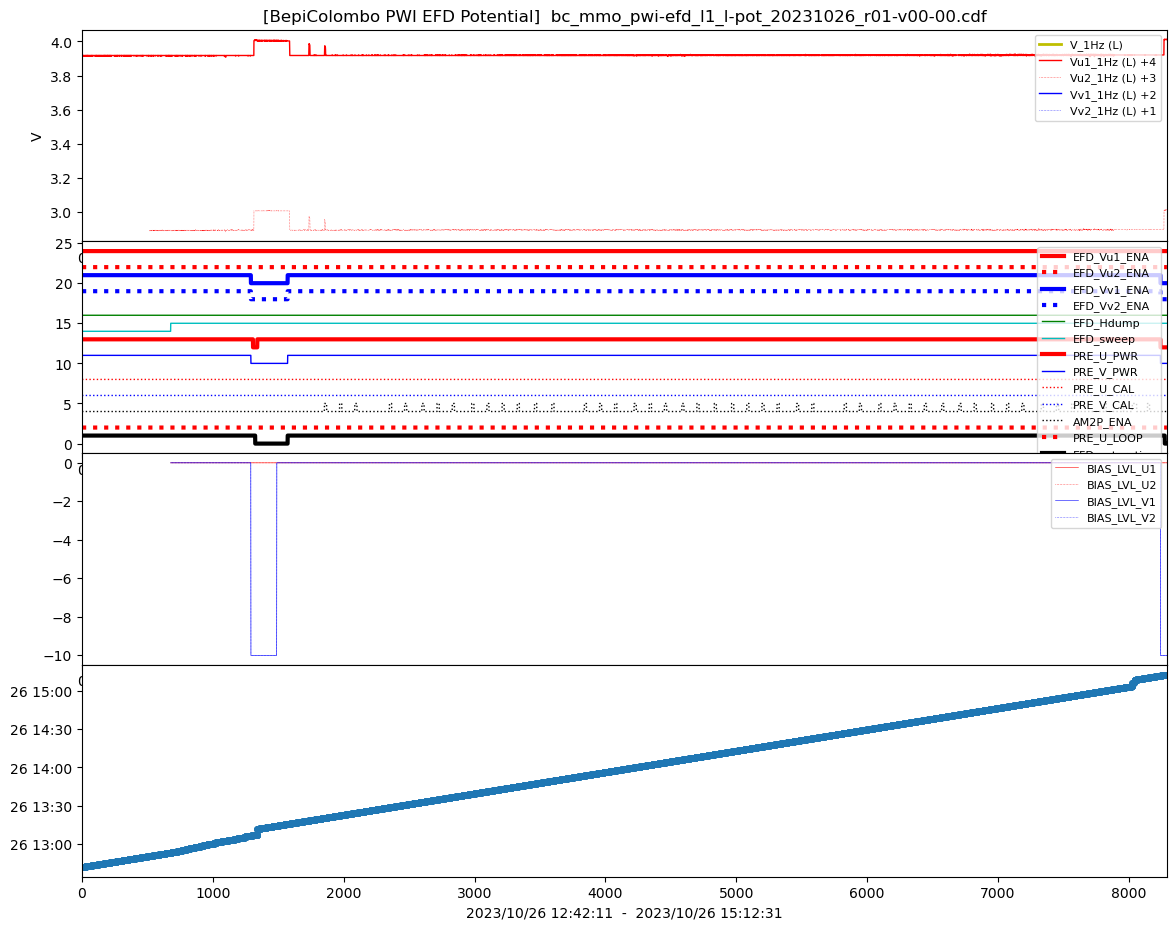

In [50]:
n0 = 0;                 n1    = n_time0
# n0 = n_time0//6-100;    n1    = n_time0//6-50
p_max  = p_max0+2;      p_min = p_min0

fig = plt.figure(figsize=(14, 11))
ax1 = fig.add_subplot(4, 1, 1);  ax2 = fig.add_subplot(4, 1, 2);  ax3 = fig.add_subplot(4, 1, 3);  ax4 = fig.add_subplot(4, 1, 4)
ax1.plot(np.ravel(pot.V[n0:n1]),                   '-y', linewidth=2.0, label=str_V)
ax1.plot(np.ravel(pot.Vu1[n0:n1])+4,               '-r', linewidth=1.0, label=str_Vu1 + ' +4')
ax1.plot(np.ravel(pot.Vu2[n0:n1])+3,               ':r', linewidth=0.4, label=str_Vu2 + ' +3')
ax1.plot(np.ravel(pot.Vv1[n0:n1])+2,               '-b', linewidth=1.0, label=str_Vv1 + ' +2')
ax1.plot(np.ravel(pot.Vv2[n0:n1])+1,               ':b', linewidth=0.4, label=str_Vv2 + ' +1')
#
if mode_tlm!='h':
    ax2.plot(np.ravel(data.EFD_Vu1_ENA[n0:n1])+24, '-r', linewidth=3.0, label='EFD_Vu1_ENA')       # ???
    ax2.plot(np.ravel(data.EFD_Vu2_ENA[n0:n1])+22, ':r', linewidth=3.0, label='EFD_Vu2_ENA')       # ???
    ax2.plot(np.ravel(data.EFD_Vv1_ENA[n0:n1])+20, '-b', linewidth=3.0, label='EFD_Vv1_ENA')       # ???
    ax2.plot(np.ravel(data.EFD_Vv2_ENA[n0:n1])+18, ':b', linewidth=3.0, label='EFD_Vv2_ENA')       # ???
    ax2.plot(np.ravel(data.EFD_Hdump[n0:n1])  +16, '-g', linewidth=1.0, label='EFD_Hdump')         # ???
    ax2.plot(np.ravel(data.EFD_sweep[n0:n1])  +14, '-c', linewidth=1.0, label='EFD_sweep')
    ax2.plot(np.ravel(data.PRE_U_PWR[n0:n1])  +12, '-r', linewidth=3.0, label='PRE_U_PWR')         # ???
    ax2.plot(np.ravel(data.PRE_V_PWR[n0:n1])  +10, '-b', linewidth=1.0, label='PRE_V_PWR')
    ax2.plot(np.ravel(data.PRE_U_CAL[n0:n1])   +8, ':r', linewidth=1.0, label='PRE_U_CAL')
    ax2.plot(np.ravel(data.PRE_V_CAL[n0:n1])   +6, ':b', linewidth=1.0, label='PRE_V_CAL')
    ax2.plot(np.ravel(data.AM2P_ENA[n0:n1])    +4, ':k', linewidth=1.0, label='AM2P_ENA')
    ax2.plot(np.ravel(data.PRE_U_LOOP[n0:n1])  +2, ':r', linewidth=3.0, label='PRE_U_LOOP')        # ???
ax2.plot(np.ravel(data.EFD_saturation[n0:n1]),     '-k', linewidth=3.0, label='EFD_saturation')    # ???
#
if mode_tlm!='h':
    ax3.plot(np.ravel(data.BIAS_LVL_U1[n0:n1]),    '-r', linewidth=0.4, label='BIAS_LVL_U1')    # ???
    ax3.plot(np.ravel(data.BIAS_LVL_U2[n0:n1]),    ':r', linewidth=0.4, label='BIAS_LVL_U2')    # ???
    ax3.plot(np.ravel(data.BIAS_LVL_V1[n0:n1]),    '-b', linewidth=0.4, label='BIAS_LVL_V1')    # ???
    ax3.plot(np.ravel(data.BIAS_LVL_V2[n0:n1]),    ':b', linewidth=0.4, label='BIAS_LVL_V2')       # ???
# ax3.plot(np.ravel(data.EFD_spinrate[n0:n1]),       '-g', linewidth=1.0, label='EFD_spinrate')
# ax4.plot(np.ravel(data.EFD_spinphase[n0:n1]),    '-r', linewidth=1.0, label='EFD_spinphase')
#
ax4.plot(np.ravel(data.epoch[n0:n1]),              '.', markersize=8)

ax1.set_ylabel(pot.str_unit);  ax4.set_xlabel(str_date)
#
title_label = '[BepiColombo PWI EFD Potential]  ' + data_name;  ax1.set_title(title_label)
ax1.legend(loc='upper right', fontsize=8);  ax2.legend(loc='upper right', fontsize=8);  ax3.legend(loc='upper right', fontsize=8)

xlim=[-.5, len(np.ravel(data.Vu1[n0:n1])) -.5];    print(xlim); ax1.set_xlim(xlim)
xlim=[-.5, len(np.ravel(data.epoch[n0:n1]))-.5];   print(xlim); ax2.set_xlim(xlim); ax3.set_xlim(xlim); ax4.set_xlim(xlim)
# ylim=[10**p_min, 10**p_max];                    ax1.set_ylim(ylim)

fig.subplots_adjust(hspace=0);  fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_raw.png'
    fig.savefig(png_fname)

# Potential

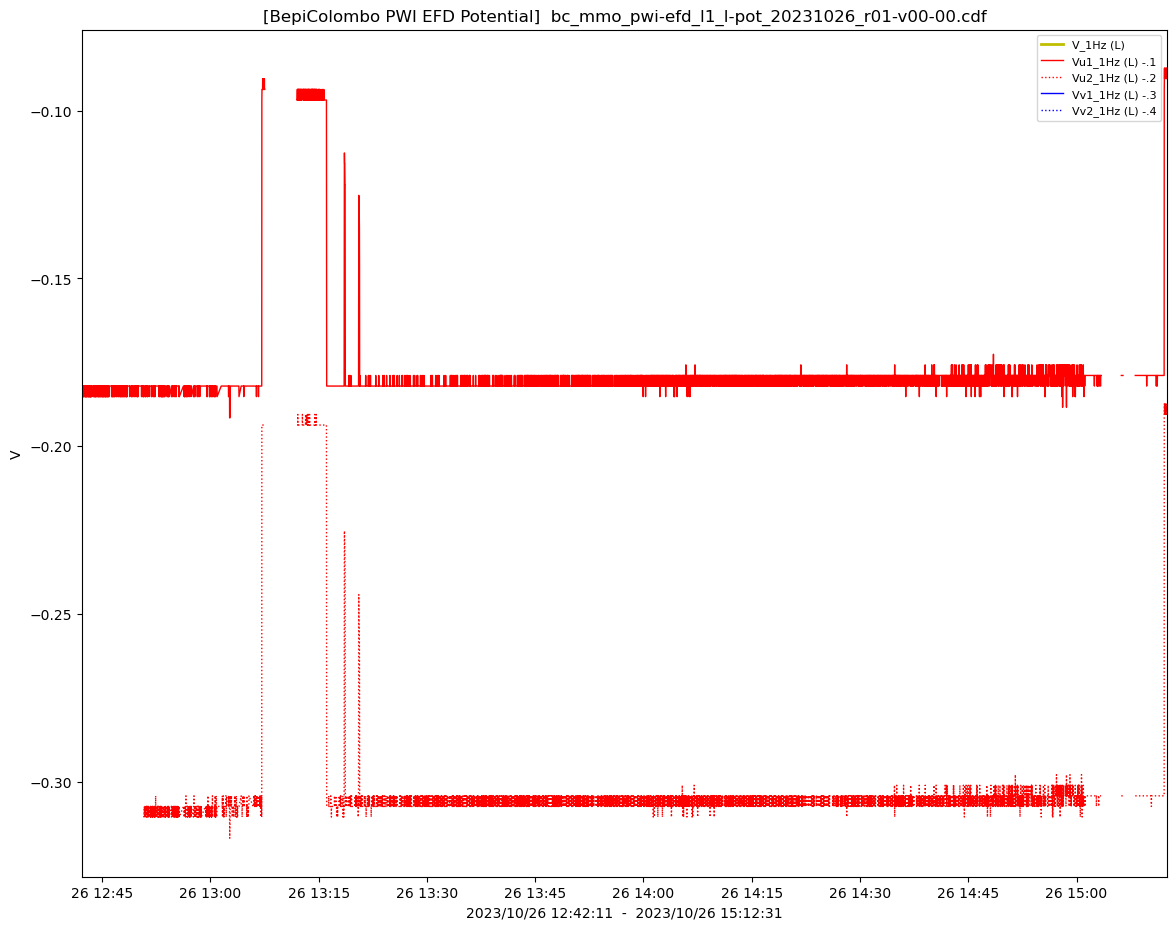

In [ ]:
n0     = 0;                 n1     = n_time0
# n0     = n_time0//10;       n1     = n_time0//6
n0e    = n0 * data.n_dt;    n1e    = n1 * data.n_dt
p_max  = p_max0+2;          p_min  = p_min0

fig = plt.figure(figsize=(14, 11))
if time_mode == 1:
    ax1 = fig.add_subplot(2, 1, 1); ax2 = fig.add_subplot(2, 1, 2)
    ax1.plot(num_1d[n0e:n1e],    np.ravel(pot.V[n0:n1]),      '-y', linewidth=2.0, label=str_V)
    ax1.plot(num_1d[n0e:n1e],    np.ravel(pot.Vu1[n0:n1])-.1, '-r', linewidth=1.0, label=str_Vu1 + ' -.1')
    ax1.plot(num_1d[n0e:n1e],    np.ravel(pot.Vu2[n0:n1])-.2, ':r', linewidth=0.4, label=str_Vu2 + ' -.2')
    ax1.plot(num_1d[n0e:n1e],    np.ravel(pot.Vv1[n0:n1])-.3, '-b', linewidth=1.0, label=str_Vv1 + ' -.3')
    ax1.plot(num_1d[n0e:n1e],    np.ravel(pot.Vv2[n0:n1])-.4, ':b', linewidth=0.4, label=str_Vv2 + ' -.4')
    ax2.plot(num_1d[n0e:n1e],    Epoch_pot[n0e:n1e],   '-k', linewidth=2.0, label='Epoch')
    ax2.set_xlabel(str_date)
else:
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.plot(Epoch_pot[n0e:n1e], np.ravel(pot.V[n0:n1]),      '-y', linewidth=2.0, label=str_V)
    ax1.plot(Epoch_pot[n0e:n1e], np.ravel(pot.Vu1[n0:n1])-.1, '-r', linewidth=1.0, label=str_Vu1 + ' -.1')
    ax1.plot(Epoch_pot[n0e:n1e], np.ravel(pot.Vu2[n0:n1])-.2, ':r', linewidth=1.0, label=str_Vu2 + ' -.2')
    ax1.plot(Epoch_pot[n0e:n1e], np.ravel(pot.Vv1[n0:n1])-.3, '-b', linewidth=1.0, label=str_Vv1 + ' -.3')
    ax1.plot(Epoch_pot[n0e:n1e], np.ravel(pot.Vv2[n0:n1])-.4, ':b', linewidth=1.0, label=str_Vv2 + ' -.4')
    ax1.set_xlabel(str_date)
ax1.set_ylabel(pot.str_unit)
#
title_label = '[BepiColombo PWI EFD Potential]  ' + data_name;  ax1.set_title(title_label)
ax1.legend(loc='upper right', fontsize=8)

if time_mode == 1:
    xlim=[num_1d[n0e], num_1d[n1e-1]]
    ax1.set_xlim(xlim); ax2.set_xlim(xlim)
else:
    xlim=[Epoch_pot[n0e], Epoch_pot[n1e-1]]
    #E_min = '2024-08-21 04:00:00';  t_min = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S");  
    #E_max = '2024-08-21 19:00:00';  t_max = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S");  xlim=[t_min, t_max]
    ax1.set_xlim(xlim)
# ylim=[p_min, p_max];  ax1.set_ylim(ylim)

fig.subplots_adjust(hspace=0);  fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_V.png'
    fig.savefig(png_fname)